In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns       
import glob
pd.options.display.max_columns = None


In [4]:
li = [] 
path = '../data/dataset'
all_files = glob.glob(path + "/*.csv")
for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, sep=';', decimal=',')
    li.append(df)
frame = pd.concat(li, ignore_index=True)
PK = ['orgao_nome', 'empenho_numero', 'subempenho', 'empenho_ano']
print(len(frame))



../data/dataset/recife-dados-despesas-2016.csv
../data/dataset/recife-dados-despesas-2014.csv
../data/dataset/recife-dados-despesas-2015.csv
../data/dataset/recife-dados-despesas-2019.csv
../data/dataset/recife-dados-despesas-2013.csv
../data/dataset/recife-dados-despesas-2018.csv
../data/dataset/recife-dados-despesas-2020.csv
../data/dataset/recife-dados-despesas-2017.csv
702775


In [74]:
###todos os orgao tem empenhos repetidos com base na PK

print(len(frame.orgao_nome.unique()))
len(frame.loc[frame.duplicated(subset=PK2, keep=False)]['orgao_nome'].unique())


72


72

In [79]:
# olhar para a Sec. da Mulher
print(len(frame[frame.orgao_nome=='SECRETARIA DA MULHER']))
frame[frame.orgao_nome == 'SECRETARIA DA MULHER']\
.loc[frame.duplicated(subset=PK2, keep=False)].sort_values(by=PK)

1090


ano_movimentacao  mes_movimentacao            orgao_nome  \
386605              2019                12  SECRETARIA DA MULHER   
387019              2019                 2  SECRETARIA DA MULHER   
334272              2019                 2  SECRETARIA DA MULHER   
351681              2019                 5  SECRETARIA DA MULHER   
351703              2019                10  SECRETARIA DA MULHER   
...                  ...               ...                   ...   
351789              2019                11  SECRETARIA DA MULHER   
388820              2019                11  SECRETARIA DA MULHER   
389382              2019                12  SECRETARIA DA MULHER   
399310              2019                12  SECRETARIA DA MULHER   
402449              2019                11  SECRETARIA DA MULHER   

                                       unidade_nome categoria_economica_nome  \
386605  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
387019  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
334272  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
351681  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
351703  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
...                                             ...                      ...   
351789  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
388820  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
389382  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
399310  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   
402449  SECRETARIA DA MULHER - ADMINISTRAÇÃO DIRETA       DESPESAS CORRENTES   

               grupo_despesa_nome modalidade_aplicacao_nome  \
386605  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
387019  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
334272  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
351681  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
351703  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
...                           ...                       ...   
351789  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
388820  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
389382  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
399310  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   
402449  OUTRAS DESPESAS CORRENTES        APLICAÇÕES DIRETAS   

                                         elemento_nome  \
386605  OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA   
387019  OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA   
334272              PASSAGENS E DESPESAS COM LOCOMOÇÃO   
351681              PASSAGENS E DESPESAS COM LOCOMOÇÃO   
351703              PASSAGENS E DESPESAS COM LOCOMOÇÃO   
...                                                ...   
351789              PASSAGENS E DESPESAS COM LOCOMOÇÃO   
388820  OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA   
389382  OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA   
399310              PASSAGENS E DESPESAS COM LOCOMOÇÃO   
402449              PASSAGENS E DESPESAS COM LOCOMOÇÃO   

                          subelemento_nome            funcao_nome  \
386605         FORNECIMENTO DE ALIMENTAÇÃO  DIREITOS DA CIDADANIA   
387019         FORNECIMENTO DE ALIMENTAÇÃO  DIREITOS DA CIDADANIA   
334272                 LOCAÇÃO DE VEÍCULOS  DIREITOS DA CIDADANIA   
351681                 LOCAÇÃO DE VEÍCULOS  DIREITOS DA CIDADANIA   
351703                 LOCAÇÃO DE VEÍCULOS  DIREITOS DA CIDADANIA   
...                                    ...                    ...   
351789                 LOCAÇÃO DE VEÍCULOS  DIREITOS DA CIDADANIA   
388820     SERVIÇOS DE ÁUDIO, VÍDEO E FOTO  DIREITOS DA CIDADANIA   
389382     SERVIÇOS DE ÁUDIO, VÍDEO E FOTO  DIREITOS DA CIDADANIA   
399310  SERVIÇOS DE TRANSPORTES DE PESSOAS  DIREITOS DA CIDADANIA   
402449  SERVIÇOS 

In [5]:
frame[['valor_empenhado', 'valor_liquidado', 'valor_pago']] = \
frame[['valor_empenhado', 'valor_liquidado', 'valor_pago']].astype('float')
frame.dtypes

ano_movimentacao                 int64
mes_movimentacao                 int64
orgao_codigo                     int64
orgao_nome                      object
unidade_codigo                  object
unidade_nome                    object
categoria_economica_codigo       int64
categoria_economica_nome        object
grupo_despesa_codigo             int64
grupo_despesa_nome              object
modalidade_aplicacao_codigo      int64
modalidade_aplicacao_nome       object
elemento_codigo                  int64
elemento_nome                   object
subelemento_codigo               int64
subelemento_nome                object
funcao_codigo                    int64
funcao_nome                     object
subfuncao_codigo                 int64
subfuncao_nome                  object
programa_codigo                  int64
programa_nome                   object
acao_codigo                      int64
acao_nome                       object
fonte_recurso_codigo             int64
fonte_recurso_nome       

In [6]:
df = frame
df1 = df 


In [7]:
#dropa os codigos
df1.drop(df1.filter(regex='codigo$', axis=1).axes[1], axis=1, inplace=True)

#mantem os nomes como categorias
#df1[df1.filter(regex='nome$', axis=1).axes[1]] = df1[df1.filter(regex='nome$', axis=1).axes[1]].astype('category')
#= df1[df1.filter(regex='nome$', axis=1).axes[1]].astype('category')

df1.dtypes


ano_movimentacao               int64
mes_movimentacao               int64
orgao_nome                    object
unidade_nome                  object
categoria_economica_nome      object
grupo_despesa_nome            object
modalidade_aplicacao_nome     object
elemento_nome                 object
subelemento_nome              object
funcao_nome                   object
subfuncao_nome                object
programa_nome                 object
acao_nome                     object
fonte_recurso_nome            object
empenho_ano                    int64
empenho_modalidade_nome       object
empenho_numero                 int64
subempenho                     int64
indicador_subempenho          object
credor_nome                   object
modalidade_licitacao_nome     object
valor_empenhado              float64
valor_liquidado              float64
valor_pago                   float64
dtype: object

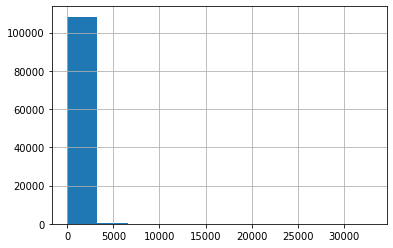

In [83]:
(x['valor_empenhado']/1000).hist()


/home/saci/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


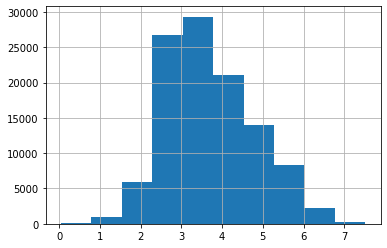

In [84]:
x['log_price'] = x['valor_empenhado'].apply(np.log10)
x[x['log_price'] > 0]['log_price'].hist()



In [ ]:
### Testa para visualizar repetições na chave unica

#print(len(x))
#[['empenho_ano','empenho_numero']].groupby(['empenho_ano']).count().sum()
print(x[['empenho_ano','empenho_numero']].groupby(['empenho_ano']).count())
      #groupby(['empenho_ano']).count())
for y in x['empenho_ano'].unique():
    print(y, end=' ')
    print(len(x[x.empenho_ano == y]['empenho_numero'].unique()))


In [98]:
df1.grupo_despesa_nome.unique()

array(['PESSOAL E ENCARGOS SOCIAIS', 'OUTRAS DESPESAS CORRENTES',
       'INVESTIMENTOS', 'AMORTIZAÇÃO DA DÍVIDA',
       'JUROS E ENCARGOS DA DÍVIDA', 'INVERSÕES FINANCEIRAS'],
      dtype=object)

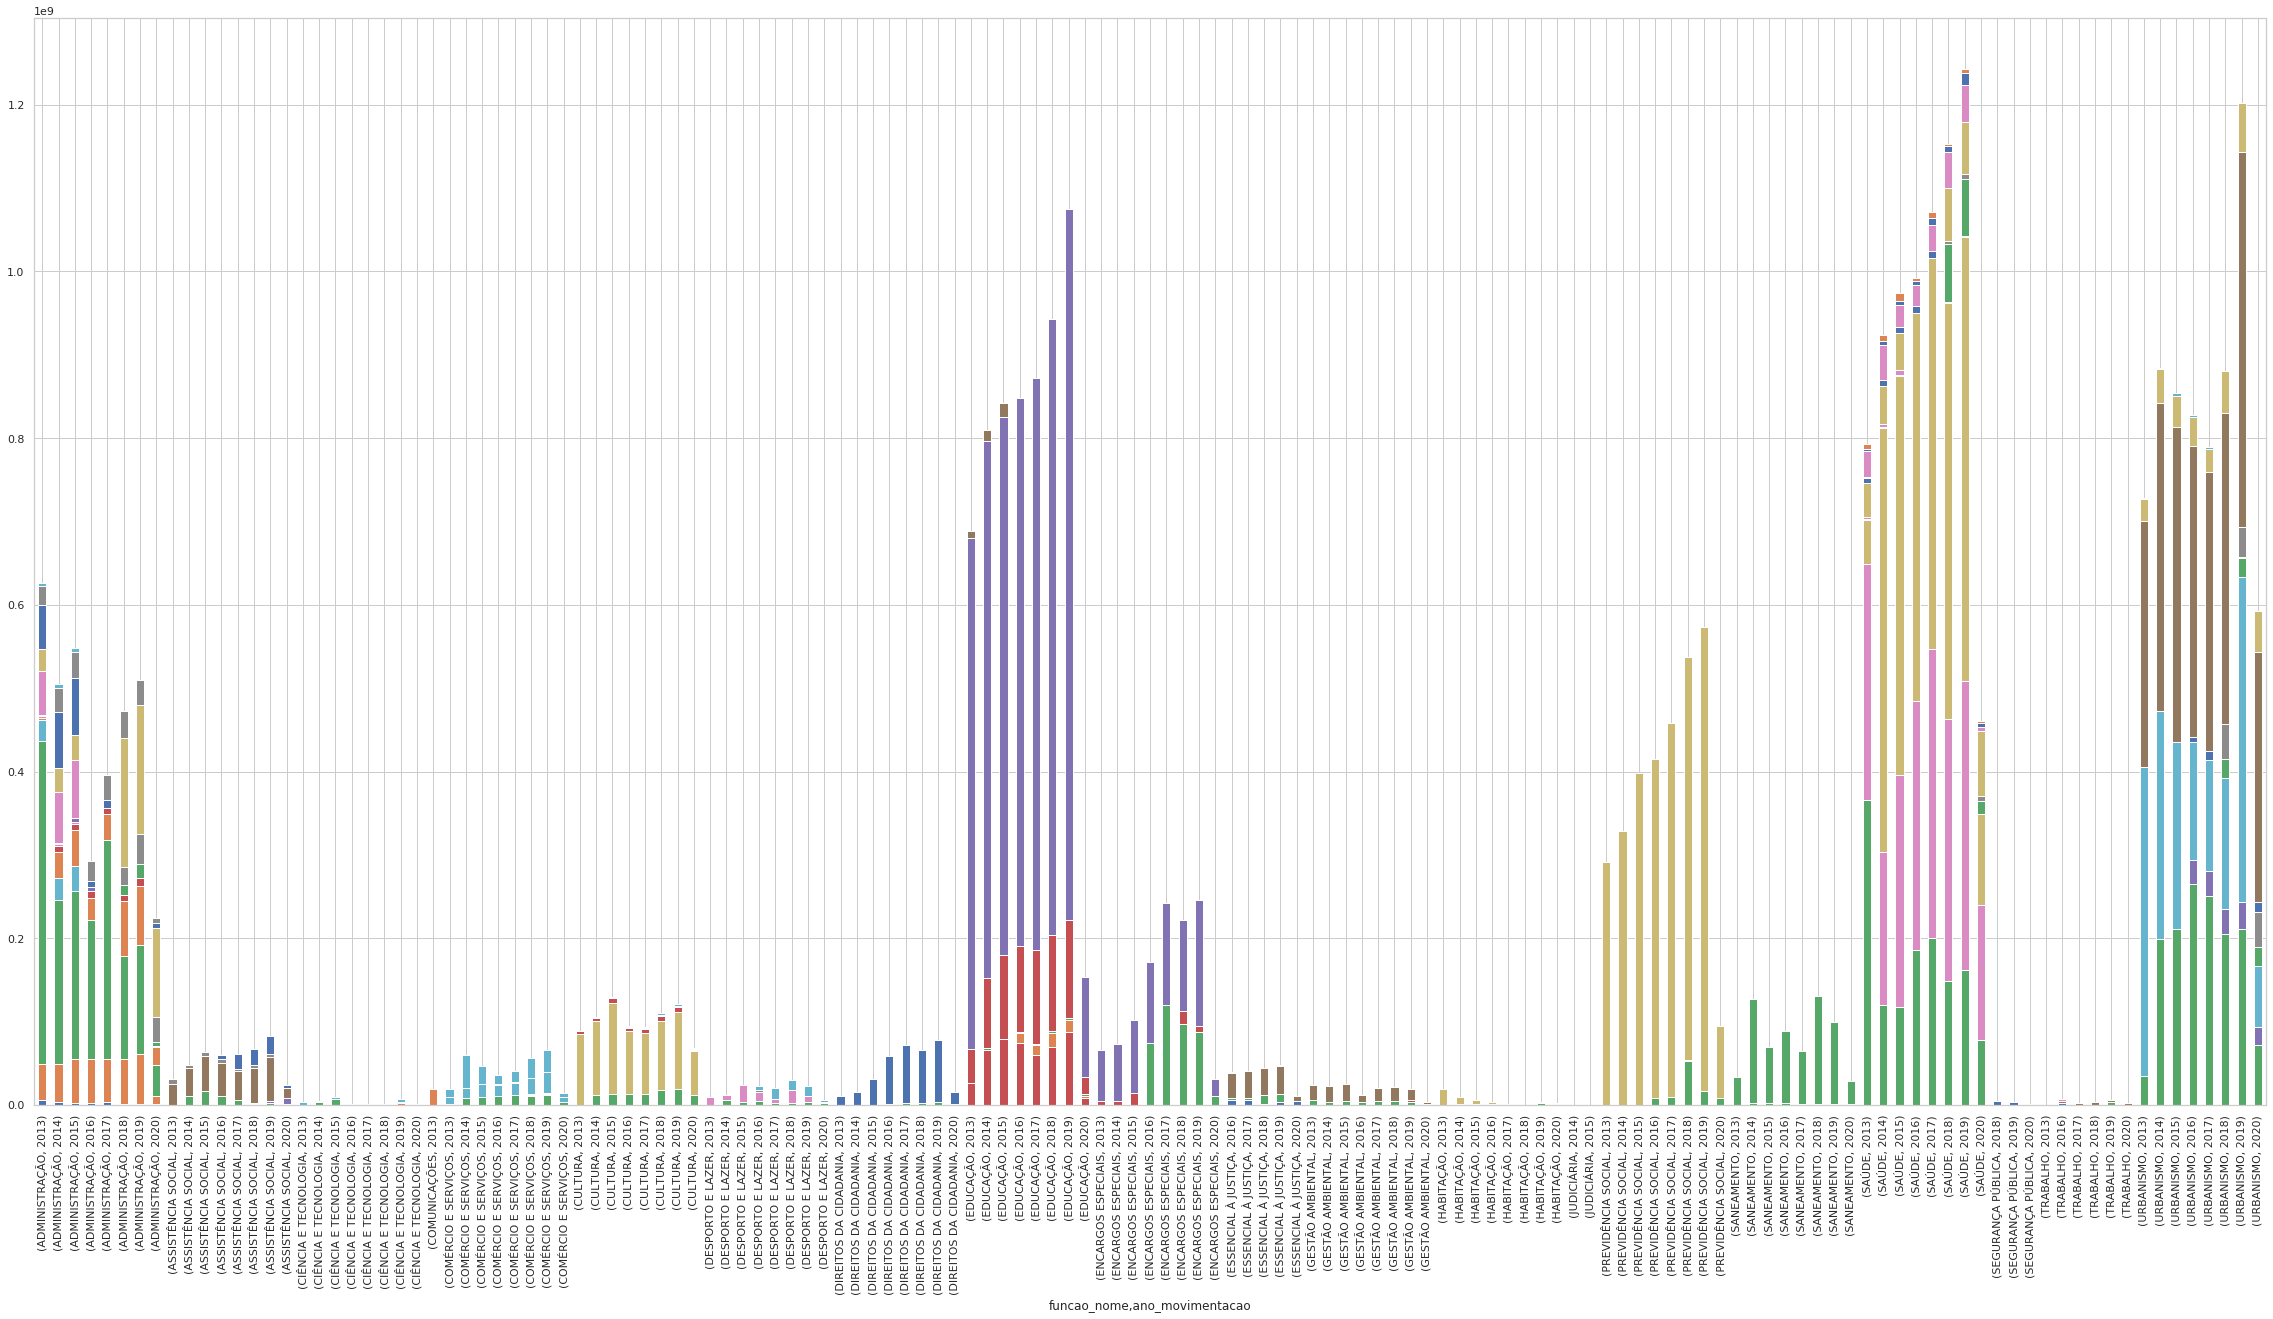

In [115]:
#Pergunta4
'''
df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)
'''
df3 = df1.groupby(['funcao_nome','ano_movimentacao','subfuncao_nome'])['valor_empenhado'].sum().unstack('subfuncao_nome')
df3.plot(kind='bar', stacked=True, legend=False, figsize=(40,20))

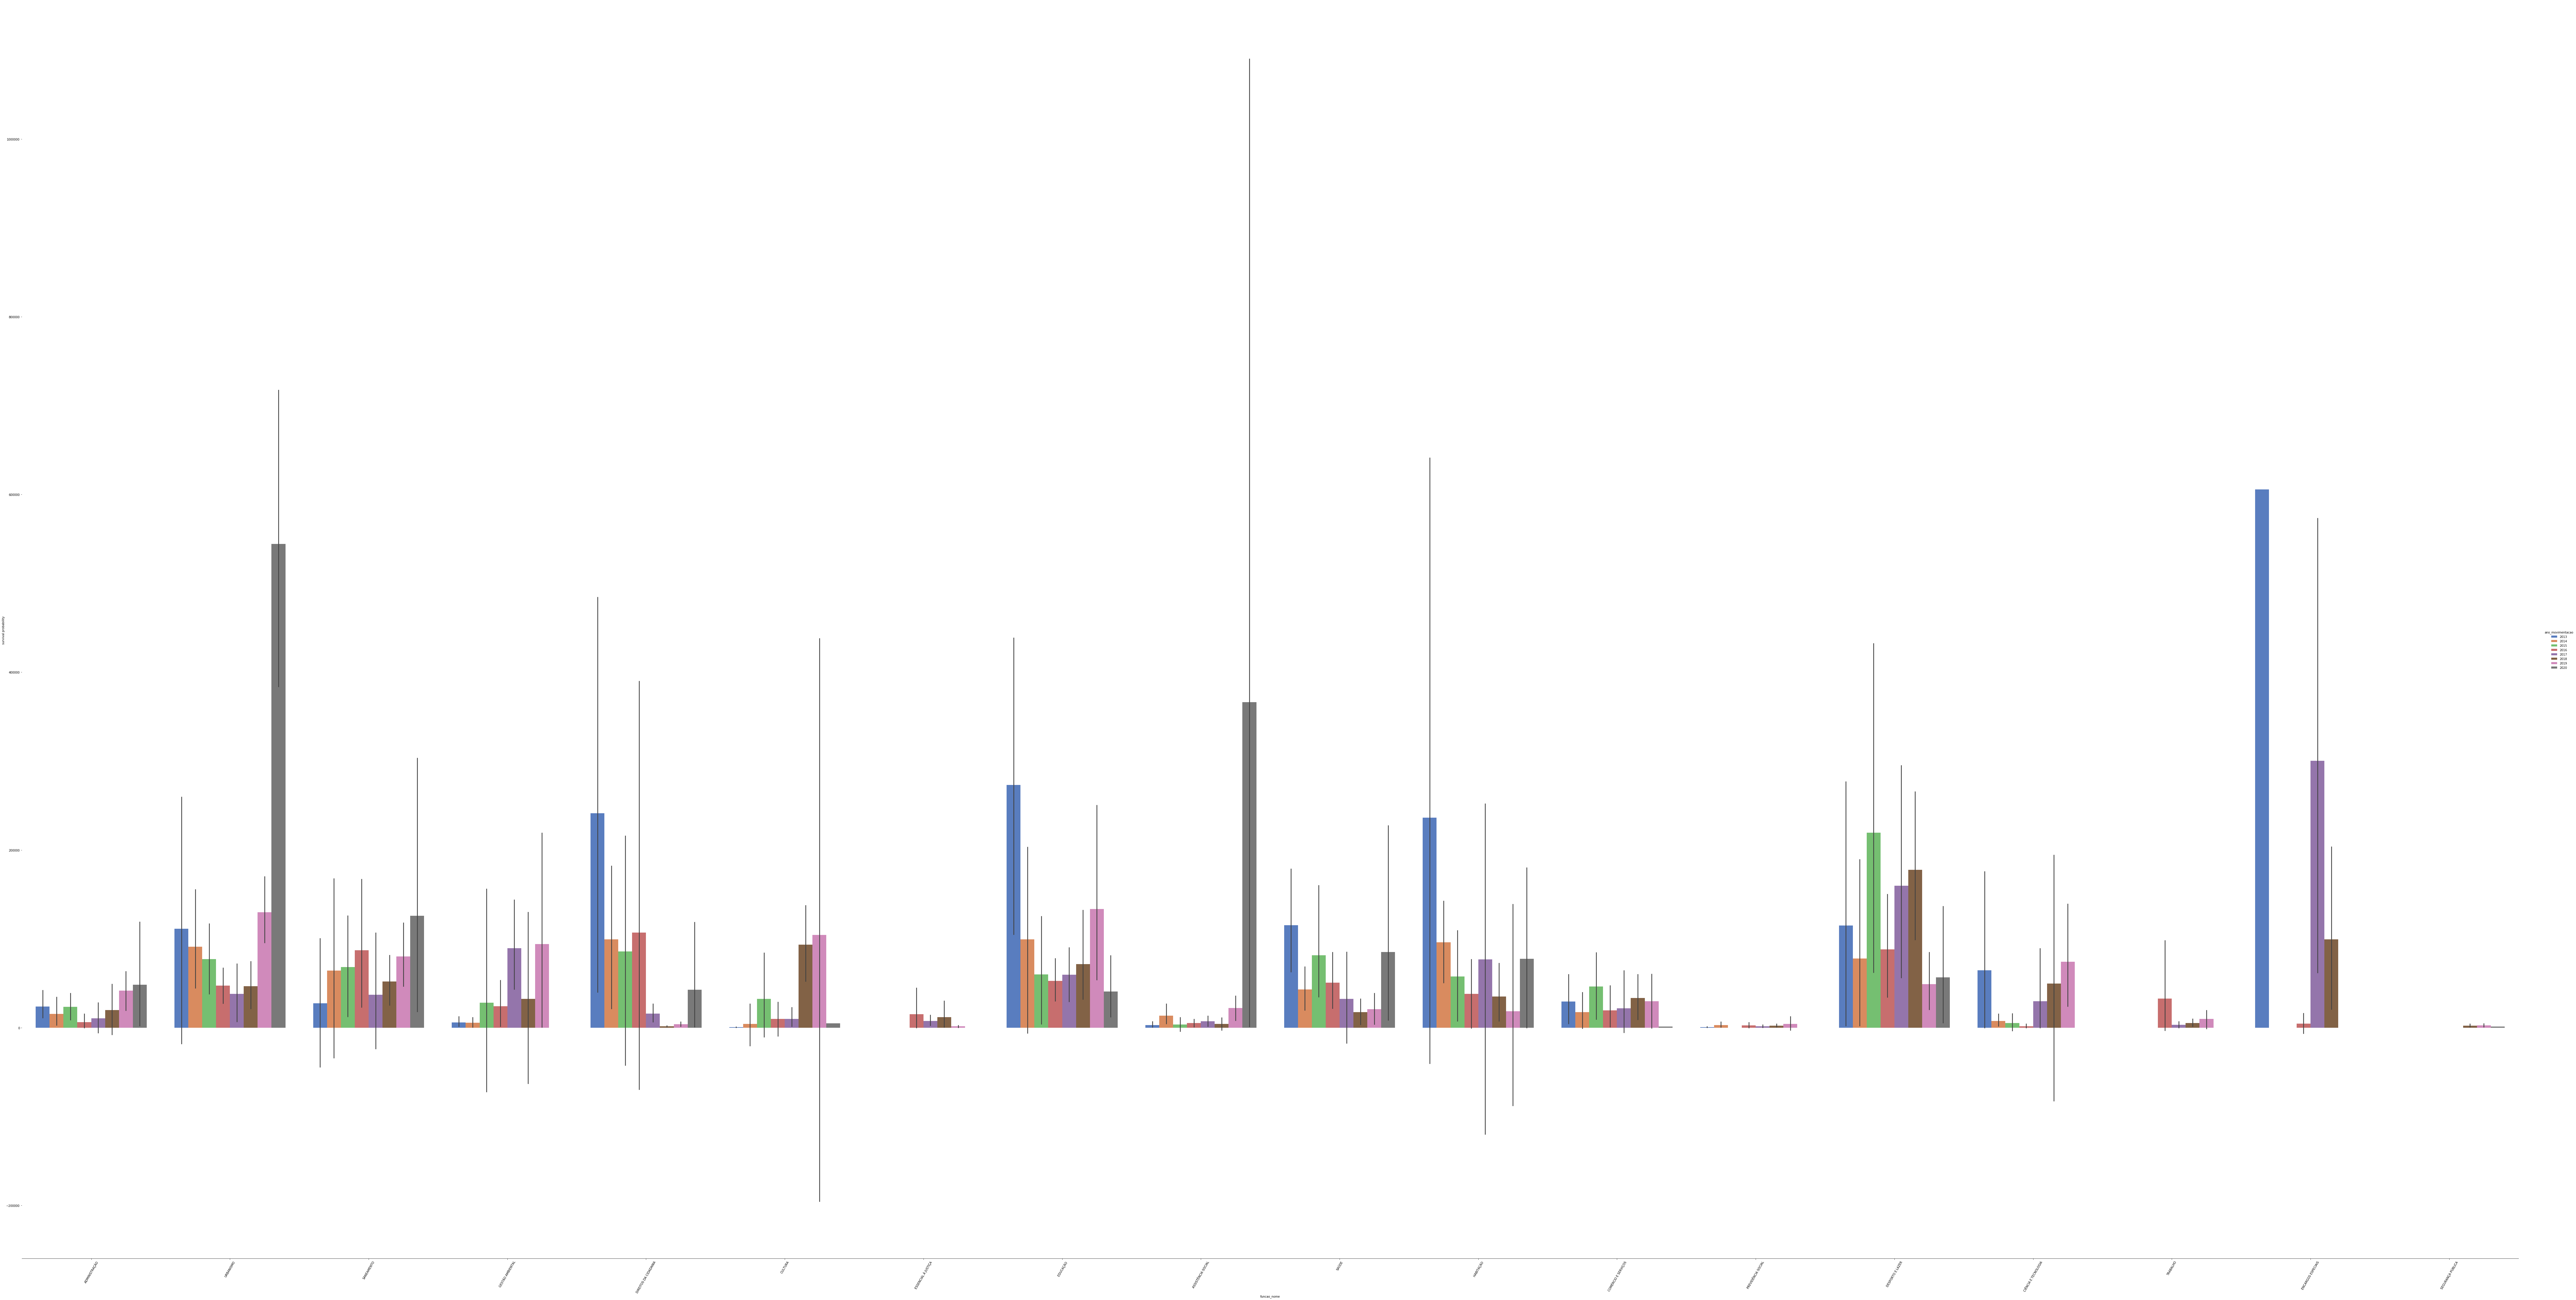

In [8]:
#Pergunta4
'''
height=8.27, aspect=11.7/8.27
'''
g = sns.catplot(x="funcao_nome", y="valor_empenhado", hue="ano_movimentacao", data=df1[df1.grupo_despesa_nome=='INVESTIMENTOS'],\
                height=60, aspect=120/60, kind="bar", palette="muted", legend=True)
g.despine(left=True)
g.set_ylabels("survival probability")
g.set_xticklabels(rotation=60)

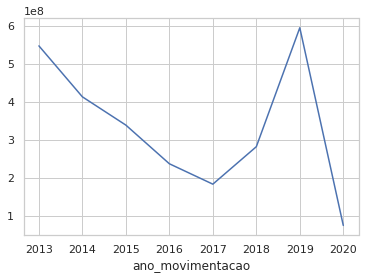

In [101]:
#Pergunta3
df1[(df1.grupo_despesa_nome == 'INVESTIMENTOS')].groupby(['ano_movimentacao'])['valor_empenhado']\
.sum().plot()

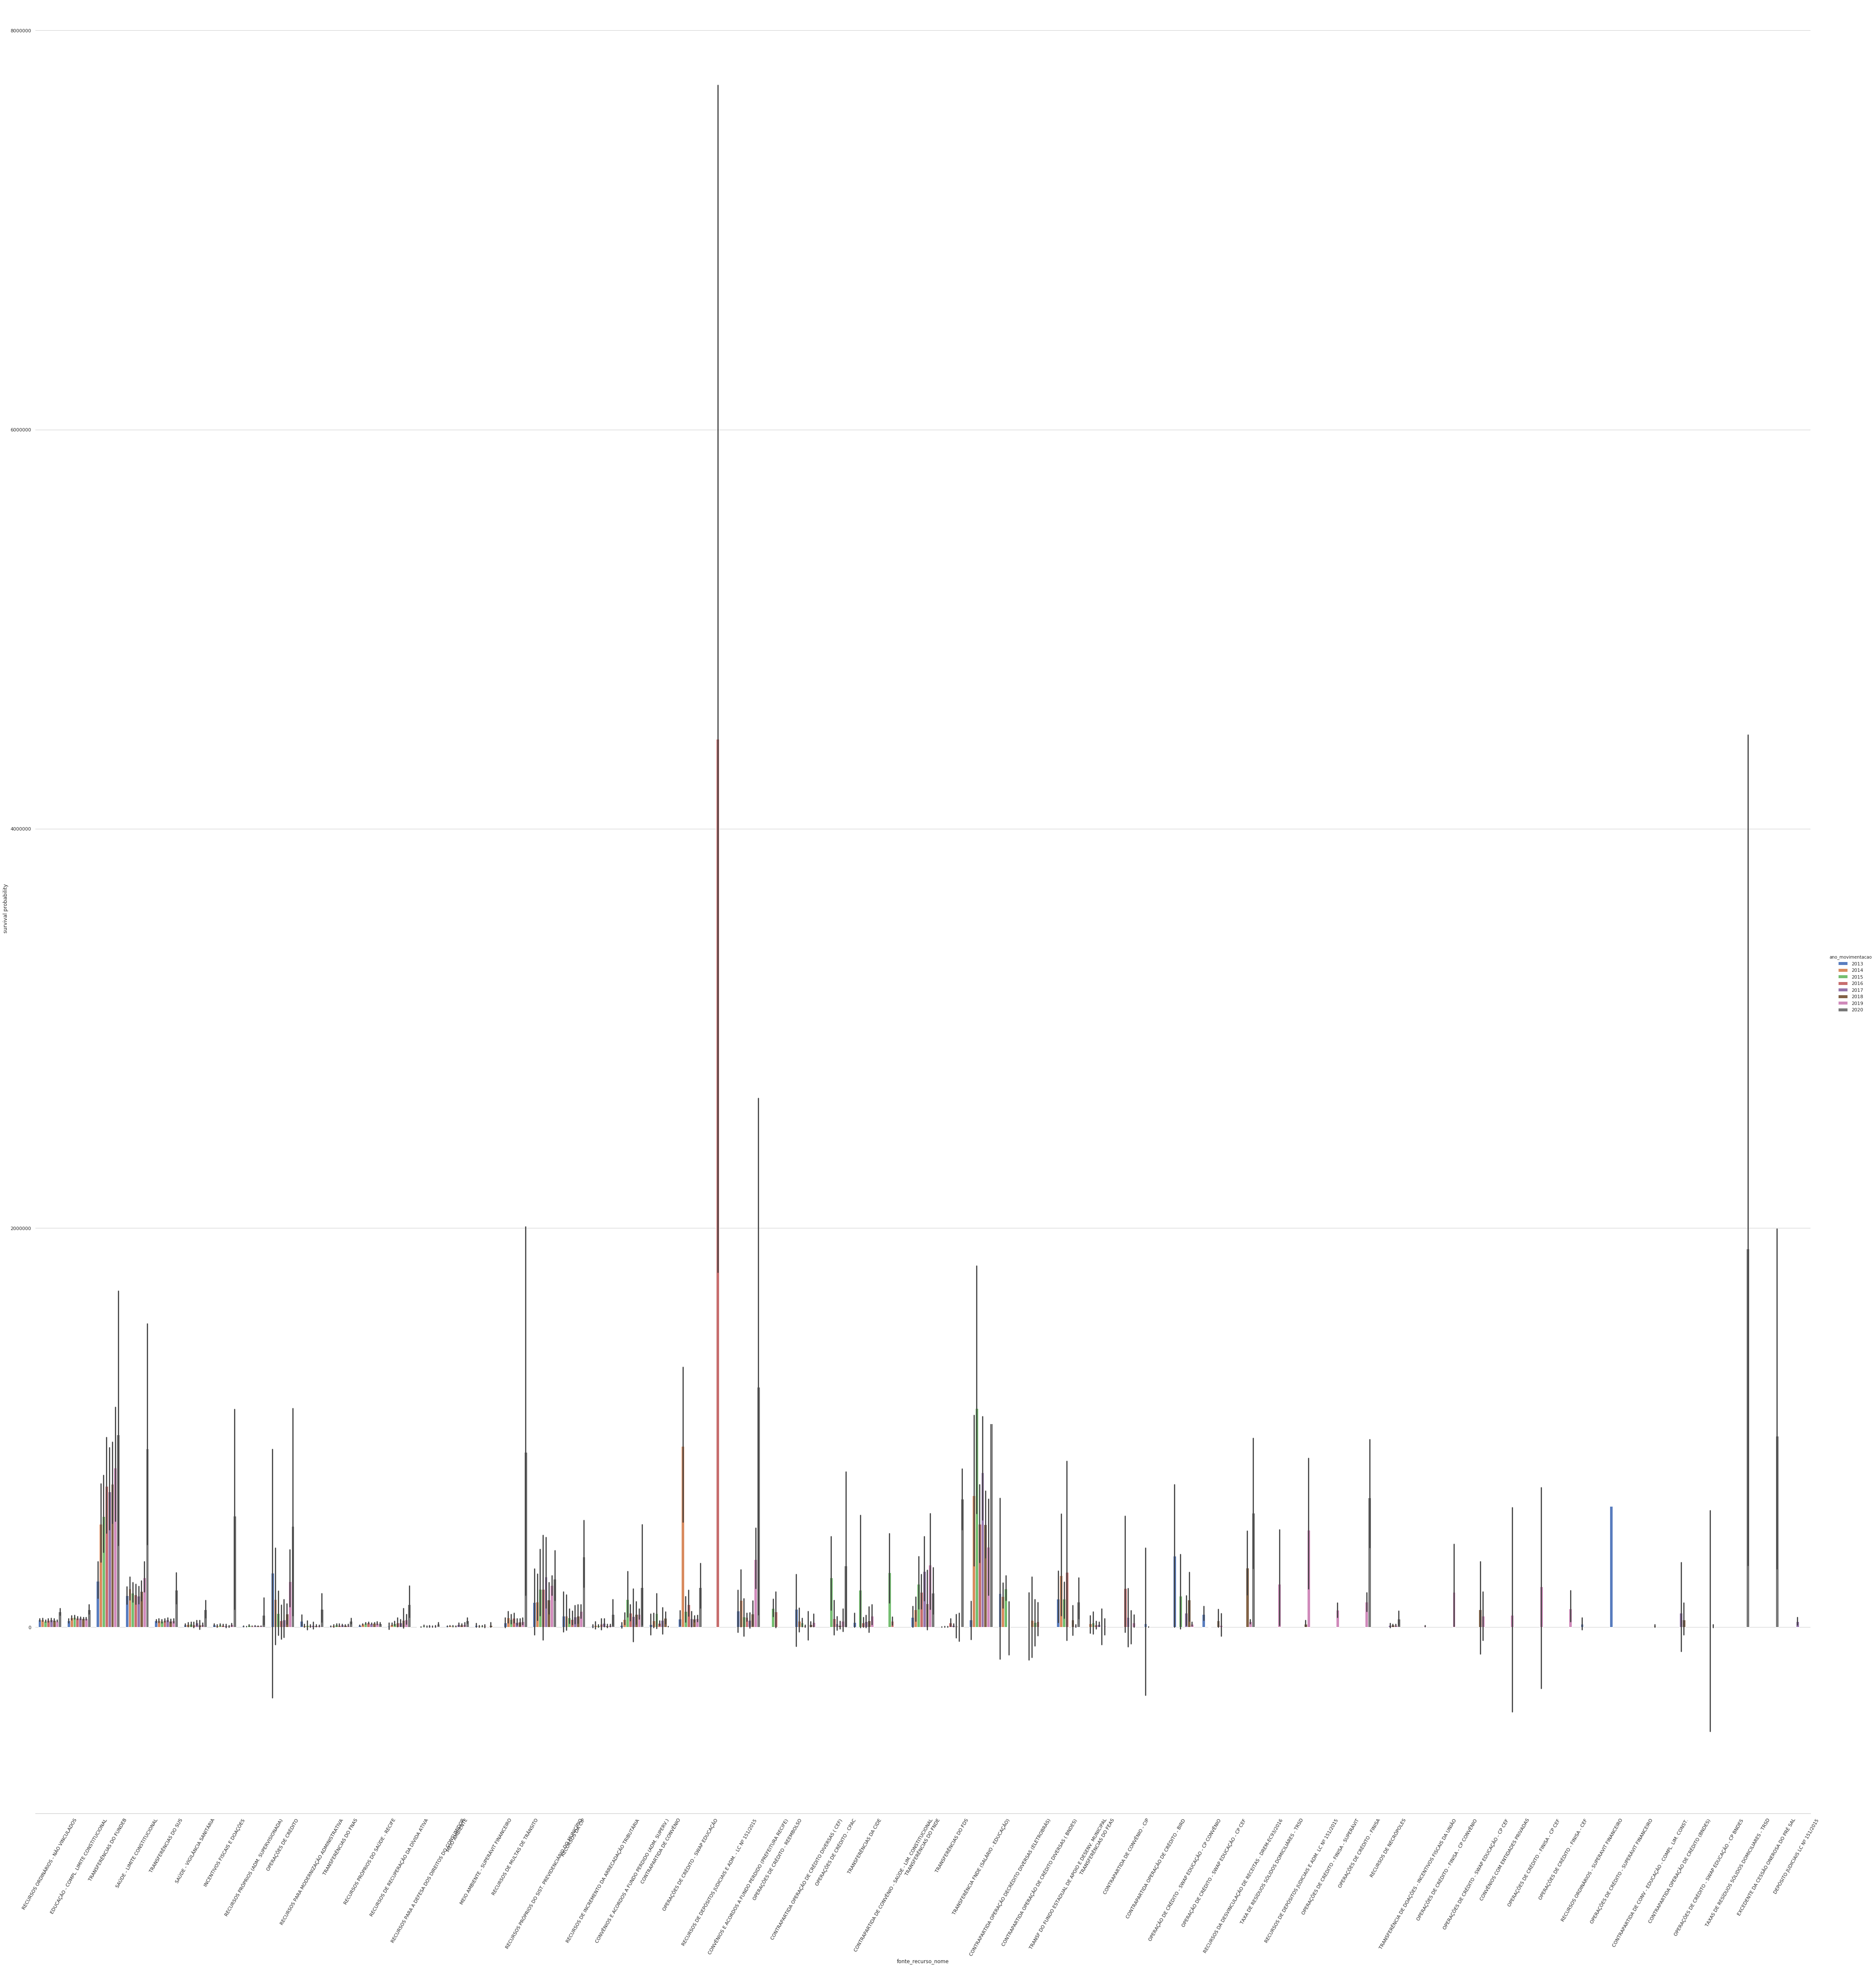

In [97]:
#Pergunta1
g = sns.catplot(x="fonte_recurso_nome", y="valor_empenhado", hue="ano_movimentacao", data=df1,\
                height=60, kind="bar", palette="muted", legend=True)
g.despine(left=True)
g.set_ylabels("survival probability")
g.set_xticklabels(rotation=60)

In [92]:
## Diferenças com o consultas livres

df1[(df1.ano_movimentacao == 2019) | (df1.empenho_ano == 2019)].groupby(['fonte_recurso_nome'])['valor_empenhado']\
.sum()


fonte_recurso_nome
CONTRAPARTIDA DE CONVÊNIO                                  2.511425e+05
CONTRAPARTIDA DE CONVÊNIO - CIP                            8.276337e+04
CONTRAPARTIDA OPERAÇÃO DE CRÉDITO DIVERSAS ( CEF)          1.503177e+06
CONVÊNIOS COM ENTIDADES PRIVADAS                           2.948705e+05
CONVÊNIOS E ACORDOS A FUNDO PERDIDO (ADM. SUPERV.)         3.351059e+07
CONVÊNIOS E ACORDOS A FUNDO PERDIDO (PREFEITURA RECIFE)    1.068971e+08
EDUCAÇÃO - COMPL. LIMITE CONSTITUCIONAL                    6.170766e+08
INCENTIVOS FISCAIS E DOAÇÕES                               3.008206e+06
MEIO AMBIENTE                                              1.674905e+06
OPERAÇÃO DE CRÉDITO - SWAP EDUCAÇÃO - CP CEF               1.760870e+05
OPERAÇÃO DE CRÉDITO - SWAP EDUCAÇÃO - CP CONVÊNIO          7.295040e+05
OPERAÇÕES DE CRÉDITO                                       1.261322e+08
OPERAÇÕES DE CRÉDITO - CPAC                                8.307871e+06
OPERAÇÕES DE CRÉDITO - FINISA                

In [ ]:
x[x.ano_movimentacao == 2019]['valor_empenhado']\
.describe()

In [ ]:
lindex = []
for index, row in df.iterrows():
    if (row['subempenho'] != 0):
        print(df[(df.mes_movimentacao == row.mes_movimentacao) \
                    (df.empenho_ano == row.empenho_ano) & (df.orgao_nome == row.orgao_nome)\
                     & (df.empenho_numero == row.empenho_numero) & (df.subempenho == 0)]\
        [['valor_liquidado', 'valor_pago']])
        #= row.valor_liquidado, row.valor_pago
        input()

In [ ]:
df.iloc[60441] == df.iloc[60442]

In [ ]:
df2 = df1[['ano_movimentacao', 'orgao_nome', "empenho_numero", \
                          'subempenho',"valor_empenhado", 'valor_liquidado', 'valor_pago']]


In [ ]:
tdf = df2[(df2.empenho_numero > 1500) & (df2.orgao_nome == 'SECRETARIA DE CULTURA') ]

In [ ]:
tdf.iloc[lambda x: x.subempenho != 0]

In [ ]:
#mapeia x,S,N em Nan,True,False
mapBool = {'x': None, 'N':False, 'S':True}

df1['indicador_subempenho'] = df1['indicador_subempenho'].map(mapBool)

#transforma em booleano // não funciona, tem que decidir oq faz com o NaN
#df1.indicador_subempenho = df1.indicador_subempenho.astype('boolean')
df1.dtypes


In [ ]:
df2 = df1[df1.filter(regex='^valor', axis=1).axes[1].insert(0,'ano_movimentacao')]
df1[df1.valor_pago > 1000 & df1.subempenho == 0]
#.groupby('ano_movimentacao').describe().unstack(0)


In [ ]:
df1['indicador_subempenho']


In [ ]:
x = []
divida=0
social = 0
for index, row in df.iterrows():
    x.append(row['grupo_despesa_nome'])
    if ( (row['grupo_despesa_nome'] == 'JUROS E ENCARGOS DA DÍVIDA')):
        divida += row['valor_pago']
    elif (row['grupo_despesa_nome'] == 'PESSOAL E ENCARGOS SOCIAIS'):
        social += row['valor_pago']

In [ ]:
#for i in set(x):
#    if 'UFPE' in i:
#        print (i)
#divida
#set(x)
plt.bar(['Dívida', 'Social'], [divida, social])

plt.show()

In [ ]:
plt.subplots(figsize=(24,12))
plt.bar(x,y)

plt.savefig('asd.png')  

In [ ]:
dic2

In [ ]:
print(df['valor_pago'].describe())

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(df['valor_pago'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
#del df['ano_movimentacao']
del df['mes_movimentacao']
list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()


In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
df_num_corr = df_num.corr()['valor_pago'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['valor_pago'])

